# Cluster Analysis Notebook

In [3]:
### Importing Data files


In [ ]:
#Import Product DataSet here
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
product_data = pd.read_csv(body,sep='|')
product_data.head()

In [6]:
# The code was removed by Watson Studio for sharing.

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [7]:
#Import Transaction DataSet here
body = client_4c73b4e9125d48cf93a58e32e4df6b8a.get_object(Bucket='datascienceproject-donotdelete-pr-knsi3l5zevhael',Key='Transaction Data Set - Student 3 of 3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

transaction_data = pd.read_csv(body,sep='|')
transaction_data.head()


,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [8]:
#Import Customer Dataset Here
body = client_4c73b4e9125d48cf93a58e32e4df6b8a.get_object(Bucket='datascienceproject-donotdelete-pr-knsi3l5zevhael',Key='Customer Data Set - Student 1 of 3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

customer_data=pd.read_csv(body)
customer_data.head()


,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


### Changing data types

In [9]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))

In [10]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

### Creating Customer View

In [11]:
trans_products=transaction_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')

In [12]:
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [13]:
trans_products['Total_Price']=trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1- trans_products['DISCOUNT TAKEN'])

In [14]:
customer_prod_categ=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})

In [15]:
customer_prod_categ=customer_prod_categ.reset_index()

In [16]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')

In [17]:
trans_total_spend=trans_products.groupby('CUSTOMER NUM').agg({'Total_Price':'sum'}).\
rename(columns={'Total_Price':'TOTAL SPENT'})

In [18]:
customer_KPIs=customer_pivot.merge(trans_total_spend,how='inner',left_index=True, right_index=True )

In [19]:
customer_KPIs=customer_KPIs.fillna(0)


In [20]:
customer_all_view=customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)

In [21]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512


# Clustering  

In [22]:
#Begin Writing your code here
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [23]:
cluster_input=customer_all_view[['INCOME','TOTAL SPENT']]
cluster_input.head(5)

,INCOME,TOTAL SPENT
0,133498,6826.770
1,94475,5062.451
2,88610,8562.440
3,84313,5522.694
4,51498,213.512


In [24]:
Kmeans_model=KMeans(n_clusters=4)

In [25]:
Kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
#Run the K-means cluster algorithm on the input by using “fit_predict” method:
cluster_output = Kmeans_model.fit_predict(cluster_input)


In [39]:
#note that the result is a numpy array and not a pandas dataframe. Since we chose 4 clusters, 
#all datasets are indexed from 0-3 depending on where they fall
cluster_output

array([2, 3, 3, 3, 1, 2, 3, 0, 0, 3, 1, 0, 3, 3, 1, 3, 3, 0, 2, 1, 0, 0,
       0, 1, 0, 0, 3, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 3, 3, 3,
       2, 1, 1, 3, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 3, 0, 2, 0, 2, 3,
       3, 0, 1, 3, 3, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 0, 2, 0, 1, 0, 2, 1,
       3, 1, 0, 2, 0, 0, 0, 3, 0, 1, 2, 0, 1, 1, 1, 1, 3, 0, 0, 1, 3, 1,
       1, 1, 3, 1, 0, 1, 2, 2, 3, 3, 1, 3, 0, 1, 3, 3, 0, 3, 1, 2, 3, 3,
       1, 3, 2, 3, 2, 2, 0, 3, 3, 1, 1, 1, 3, 0, 3, 1, 0, 3, 3, 0, 0, 0,
       3, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 3, 1, 2, 3, 1, 2, 1, 0, 0, 2, 1,
       2, 2, 0, 1, 2, 1, 3, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2,
       0, 3, 0, 1, 2, 2, 0, 1, 3, 2, 2, 2, 2, 1, 0, 3, 2, 0, 1, 0, 3, 1,
       3, 1, 0, 1, 1, 1, 0, 1, 1, 3, 0, 3, 0, 3, 3, 1, 0, 2, 1, 1, 1, 3,
       3, 3, 3, 1, 0, 0, 2, 1, 3, 0, 1, 0, 1, 3, 1, 2, 0, 0, 1, 2, 1, 3,
       3, 2, 0, 3, 3, 0, 2, 1, 2, 1, 1, 1, 2, 3, 0, 0, 0, 3, 3, 3, 2, 3,
       0, 3, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1,

In [27]:
type(cluster_output)

numpy.ndarray

In [28]:
#observing pandas data frame
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [29]:
#observing numpy version of the dataset
product_data.head().values

array([[30001, 'HEALTH & BEAUTY', ' $7.45 '],
       [30002, 'HEALTH & BEAUTY', ' $5.35 '],
       [30003, 'HEALTH & BEAUTY', ' $5.49 '],
       [30004, 'HEALTH & BEAUTY', ' $6.46 '],
       [30005, 'HEALTH & BEAUTY', ' $7.33 ']], dtype=object)

In [30]:
#notice that in numpy the values are arranged in an array indexed as [row,column],starting at index 0.Thus to view the value of row 1 column2
product_data.head().values[1,2]

' $5.35 '

In [31]:
#to view all columns of row 1
product_data.head().values[1,:]

array([30002, 'HEALTH & BEAUTY', ' $5.35 '], dtype=object)

In [32]:
#convert the 1-dimensional NumPy output array to a Pandas data frame
cluster_output_pd=pd.DataFrame(cluster_output,columns=['segment'])

In [33]:
#Verify that “cluster_output_pd” is a Pandas data frame with a single column called “segment” by using the following code:
cluster_output_pd.head()

,segment
0,3
1,1
2,0
3,0
4,2


In [34]:
#Merge the cluster input containing the income and total spending for each customer and the cluster output, 
#which contains the cluster index, by using the following code:
segment_DF=pd.concat([cluster_input,cluster_output_pd],axis=1)

In [35]:
#Verify output using the following command
segment_DF.head()

,INCOME,TOTAL SPENT,segment
0,133498,6826.770,3
1,94475,5062.451,1
2,88610,8562.440,0
3,84313,5522.694,0
4,51498,213.512,2


In [36]:
#The cluster centroids that are computed by the algorithm can be found by using a method that is called “cluster_centers”. 
#As shown in the output, the first centroid is at Income =39991 and total spend=2424.8
#Apply the method to the K-means model by using the following code:
Kmeans_model.cluster_centers_
#should give a 4 by 2 array of the four clusters with the means(centroids) of each cluster for income and total spent

array([[ 76337.14084507,   5260.48642958],
       [110254.62121212,   7744.12999242],
       [ 38530.82608696,   2260.43836232],
       [138471.625     ,   6972.91513636]])

In [41]:
#To select only those segments that belong to the first cluster (cluster index=0), use the following code:

segment_DF[segment_DF.segment==0].head()

#Condition “segment==0” selects only those assigned to the first cluster. Similarly, you can do the same for other clusters

,INCOME,TOTAL SPENT,segment
2,88610,8562.440,0
3,84313,5522.694,0
6,65002,5224.616,0
9,76994,6620.147,0
12,88829,4685.902,0


In [38]:
#Plot the clustering results. First, import the plotting library by using the following code:

import matplotlib.pyplot as plt

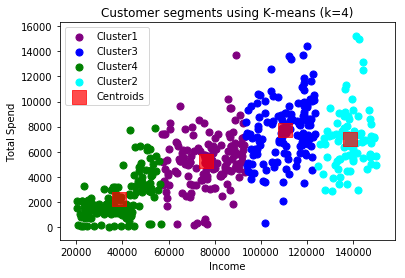

In [39]:
#Use the filter condition that was applied in line 54 to select only those customers that belong to the first cluster. 
#Plot their income and age in purple. Select the second cluster and plot their income and age in blue. Repeat for clusters 3 and 4. 
#Plot the cluster centroids that you have computed in step 9.
#The following code snippet contains many lines of code. The first four lines plot the points that belong to each cluster (0,1,2,3),
# the fifth line plots the cluster centroids, and the remaining lines set the title, legend, and the axis names for the graph. 
#Copy the code, run it, and observe the scattered cluster plot, which is shown in Figure 3
plt.scatter(segment_DF[segment_DF.segment==0]['INCOME'],segment_DF[segment_DF.segment==0]['TOTAL SPENT'],s=50, c='purple',label='Cluster1')

plt.scatter(segment_DF[segment_DF.segment==1]['INCOME'],segment_DF[segment_DF.segment==1]['TOTAL SPENT'],s=50, c='blue',label='Cluster3')

plt.scatter(segment_DF[segment_DF.segment==2]['INCOME'],segment_DF[segment_DF.segment==2]['TOTAL SPENT'],s=50, c='green',label='Cluster4')

plt.scatter(segment_DF[segment_DF.segment==3]['INCOME'],segment_DF[segment_DF.segment==3]['TOTAL SPENT'],s=50, c='cyan',label='Cluster2')

plt.scatter(Kmeans_model.cluster_centers_[:,0], Kmeans_model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments using K-means (k=4)')

plt.xlabel('Income')

plt.ylabel('Total Spend')

plt.legend()

plt.show()


In [42]:
#Retailer X must know all about the different customer segments demographics. 
#So, you must discover the characteristics that are associated with each segment, 
#such as the age group, household size, and loyalty enrolment. To do this task, group by each customer segment and calculate group measures such as average age, percentage of loyalty enrolment, and median of house hold size.
#Merge the clustering output with the customer all view by using the following code:
customer_demographics=pd.concat([customer_all_view,cluster_output_pd],axis=1)
#print the output with
customer_demographics.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,segment
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770,3
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451,1
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440,0
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694,0
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512,2


In [44]:
#Using the group by and simple aggregate functions,the following code gives the median household size and the mean age per segment:
customer_demographics.groupby('segment').agg({'HOUSEHOLD SIZE':'median','AGE':'mean'})
#the instructions used the median household size but the mean can be used since there are no outliers in the household size

,HOUSEHOLD SIZE,AGE
segment,,
0,3,35.661972
1,3,47.416667
2,2,24.449275
3,2,73.420455


In [46]:
#With regards to loyalty enrolment, you must calculate the percentage of participation by using the following formula:
#      percentage loyalty enrolment  per cluster = 100 * number enrolled in that cluster/total number of customers in that cluster
#So, you create a function by the name “percent_loyalty” by using the following code:
def percent_loyalty(series):
    percent=100 * series.value_counts()['enrolled'] /series.count()
    return percent
#to include it in the customer demographics view created for each cluster
customer_demographics.groupby('segment').agg({'HOUSEHOLD SIZE':'median','AGE':'mean','LOYALTY GROUP': percent_loyalty})

,HOUSEHOLD SIZE,AGE,LOYALTY GROUP
segment,,,
0,3,35.661972,32.394366
1,3,47.416667,66.666667
2,2,24.449275,52.173913
3,2,73.420455,65.909091
